<br>
    <br>
    <br>
    <br>
<h1 align="center">EXPERIMENT: KUGEL AUF RUTSCHBAHN </h1> 




 
</span>
    <div class="alert alert-block alert-warning">
        
<font size="2">
    <b>Handwerkszeug für dieses Notebook:</b> 

Rechenoperationen:

Multiplikation:&nbsp;&nbsp;`*`

Division:&nbsp;&nbsp;`/` 

Eingabe von Potenzen:&nbsp;&nbsp;`**`

Eingabe eines Kommas als Punkt:&nbsp;&nbsp;`.`

Eine Zelle ausführen:&nbsp;&nbsp;`Enter` und `Shift` gleichzeitig
    </div>

Führen Sie jede Zelle nacheinander aus.

In [61]:
import ipywidgets

In [62]:
import urllib
import os
from notebook import notebookapp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

import io
import base64
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Label, VBox
from IPython.display import HTML, Video, IFrame

from bokeh.plotting import figure, curdoc
from bokeh.models.widgets import Slider, CheckboxButtonGroup, PreText
from bokeh.layouts import row, column #, widgetbox
from bokeh.models import ColumnDataSource, Slider, Button, TextInput, Arrow, OpenHead, NormalHead, VeeHead
from bokeh.plotting import figure, show, ColumnDataSource

from bokeh.io import output_notebook, show, export_png

output_notebook()


Loading BokehJS ...

 
 
<div style="border-style: double; border-width: 2px; border-color:navy; padding-left: 5px;">
     <span style="color:navy"> 
 <font size=4> Physik-Themen Mechanik :
<br />
     <br />
     
  <font size=2>
      
* Energieerhaltung  
* Bewegungsgleichung    
* Drehbewegungen 
* Kinetische Energie
* Potentielle Energie

</div></span> 

 
<div style="border-style: double; border-width: 2px; border-color:navy; padding-left: 5px;">
     <span style="color:navy"> 
 <font size=4> Lernziele :
<br />
     <br />
     
  <font size=2>

* Erläutern Sie das Konzept der Erhaltung der mechanischen Energie mit kinetischer und potentieller Energie.
* Grundlegende Programmierfunktionen in Python entdecken
* Lösen grundlegender Gleichungen der Mechanik
* Modellierung der Bewegungsobjekte auf einer nicht linearen Flugbahn
</div></span> 

 <span style="color:navy"> **In diesem Labor werden Sie die reale Bewegung einer Murmel auf einer Murmelbahn durch Programmierung modellieren.** </span> 
    
 <span style="color:navy"> **Das Problem**: Eine Murmel wird in eine Rutsche fallen gelassen, die ein Looping bildet. Wenn sie nicht aus einer ausreichenden Höhe fallen gelassen wird, schließt sie den Looping nicht ab. Sie wird aus drei verschiedenen Ausgangshöhen rollen gelassen.
    Das Experiment wurde durchgeführt und gefilmt.</span>
    
  <span style="color:navy">   **Frage**: Aus welcher Höhe muss die Kugel fallen gelassen werden, damit sie den Looping vollendet?   
 *Ermitteln Sie die Flugbahn der Murmel mit Hilfe der Gesetze der Mechanik. 
 Modellieren Sie Ihre Ergebnisse und stellen Sie sie durch Programmierung in einer Grafik dar.*</span>





</span>
    

     
      



## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      

**Das gefilmte Video des Experiments und der Kern der Programmierdatei stammen aus dem unten erwähnten Notebook [1].**

## Literaturverzeichnis: <br />
[1] Cécile Hébert. 2019. EXPERIENCE DE LA BILLE SUR GLISSIÈRE. (Jupyter Notebook) <br />
https://github.com/c-hebert/MecaDRIL/blob/master/05-Travail_Energie/bille_sur_glissiere.ipynb (2022)



# A. Videos und Daten importieren <a class="anchor" id="A.Videosimportieren"></a>🎬 

Führen Sie jede Zelle nacheinander aus und beantworten Sie die Fragen.

Drei Videos zeigen das Experiment; man kann zwischen drei verschiedenen Anfangshöhen für das Fallenlassen der Kugel wählen:

In [43]:

# Input
height_label = Label('Wählen Sie eine Anfangshöhe:')
height_input = widgets.Dropdown(options=['h1', 'h3', 'h5'], value=None, 
disabled=False,)

# Output
text_output = widgets.Output()
video_output = widgets.Output()
with video_output: print("Das Video wird hier angezeigt.")

def height_event_handler(change):
     # Den Namen des ausgewählten Videos abrufen
    h = change.new

     # Outputs löschen
    text_output.clear_output()
    video_output.clear_output()

     # Daten aus dem Video importieren
    df_vid = pd.read_csv('data_bille/'+h+'-data.csv', index_col=0)
    df_vid = df_vid.rename({'VideoAnalysis: X (cm)': 'x', 
'VideoAnalysis: Y (cm)':'y', 'VideoAnalysis: X Velocity (cm/s)':'v_x', 
'VideoAnalysis: Y Velocity (cm/s)':'v_y'},
                            axis='columns')

     # Berechnen Sie die Anfangshöhe.
    y_min_vid = df_vid['y'].min()
    h_init = df_vid['y'].iloc[0] - y_min_vid

    R = 11.62

     # Zeige die Anfangshöhe an.
    with text_output:
        print('Ausgewählte Anfangshöhe: {} = {:0.2f}cm={:0.2f} R mit R=11.62cm'.format(h,h_init, h_init/R))
        
        # Fragen, die über dem Video erscheinen sollen:
    with text_output:
        print("")
        print('\033[1m FRAGE ZUM VIDEO:\033[0m')
        print("")
        print('1. Wie lautet Ihre Vorhersage für die Bewegung in Abhängigkeit der Höhe? Was passiert, wenn die Höhe zu klein ist?')
        print('2. Klicken Sie nun auf das Video und beobachten Sie die Bewegung der Murmel. Ändern Sie die Höhe h. ')
        
   
 # Video anzeigen
    with video_output:
        display(Video('data_bille/{}-dots.mov'.format(h)))
        #display(Video('{}-dots.mov'.format(h)))

# Beobachten Sie die Änderungen bei der Wahl der Höhe.
height_input.observe(height_event_handler, names='value')
# Alles anzeigen
display(VBox([height_label, height_input, text_output, video_output]));

print('3. Stimmt die gefilmte Bewegung in diesem Experiment mit Ihrer Vorhersage überein?')



# Generieren und Darstellen der Antwortmöglichkeiten
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import Button, HBox, VBox

button_links = widgets.Button(description = 'Ja', icon = 'fa-check')  
button_rechts = widgets.Button(description = 'Nein', icon = 'fa-window-close-o')   
display(HBox([button_links, button_rechts]))

out = widgets.Output()
display(out)

def on_button_clicked(button_links):
    with out:
        clear_output()
        print("👍Gut gemacht! Welche Kräfte (Reibung, Schwerkraft, Reaktionskraft,...) oder physikalischen Prinzipien (Trägheit, Newtonschsche Gesetze,...) haben Ihnen dabei geholfen, die Situation zu verstehen?")

button_links.on_click(on_button_clicked)

def on_button_clicked(button_rechts):
    with out:
        clear_output()
        print("💭 Denken Sie noch einmal über die Situation nach! Welche Kräfte (Reibung, Schwerkraft, Reaktionskraft,...) oder physikalischen Prinzipien (Trägheit, Newtonschsche Gesetze,...) helfen Ihnen dabei, die Situation zu verstehen?")

button_rechts.on_click(on_button_clicked)

# Leerraum hinzufügen
print("")


3. Stimmt die gefilmte Bewegung in diesem Experiment mit Ihrer Vorhersage überein?


Output()


## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* **[B. Details zu der Modellierung](#B.Modellierung)**
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      


# B. Details zu der Modellierung 🧑‍<a class="anchor" id="B.Modellierung"></a>💻

*Die Modellierung eines Systems ist ein wichtiger Teil der Arbeit eines Ingenieurs.*   
*In den folgenden Schritten leiten wir Sie an, Ihr eigenes Modell der physikalischen Situation zu erstellen. Bitte beantworten Sie die Fragen so sorgfältig wie möglich.* 
  
**Sie benötigen dazu einen Stift und Papier.** 📝


**Situation:** Man lässt die Kugel aus einer Höhe $h$ fallen und beobachtet ihr Verhalten am Punkt $P$, wobei man annimmt, dass sie bis $P$ der von der Rutsche vorgegebenen Bahn folgt. 


**Ziel der Modellierung**: Finden Sie die Flugbahn der Murmel und ab welcher Höhe sie einen vollständigen Looping vollenden kann.

### Fragen:  ❓


1. Welche geometrische Form würden Sie verwenden, um die Schleife zu modellieren?

  *Führen Sie die Zelle unten aus und schreiben Sie Ihre Antwort (z.B.: ein Quadrat) in das Kästchen.*

In [44]:
import ipywidgets as widgets
from IPython.display import display, clear_output
print("Schreiben Sie Ihre Antwort (z.B.: ein Quadrat) in das Kästchen:" )
b=widgets.Text(
    value='ein ...',
    placeholder='Type something',
    description='Form:',
    disabled=False
)

c = widgets.Button(
    description='Überprüfe Ergebnis',
    disabled=False,
    button_style='info',
    tooltip='Click me',
    icon=''
)
display(b,c)

out = widgets.Output()
display(out)

def on_button_clicked(c):
    with out:
        clear_output()
        print("Für die Modellierung verwendet man einen perfekten Kreis. In Wirklichkeit ist die Schleife dreidimensional, so dass der Anfang und das Ende der Schleife horizontal getrennt sind. Auf einem Blatt Papier (in 2 Dimensionen) stimmen diese beiden Punkte überein. ")                      
        print("")
        print("Wir nennen diesen Punkt O und er wird der Ursprung unserer x- und y-Achse sein, die wir zur Modellierung unserer Situation wählen.")
    
c.on_click(on_button_clicked)


Schreiben Sie Ihre Antwort (z.B.: ein Quadrat) in das Kästchen:


Text(value='ein ...', description='Form:', placeholder='Type something')

Button(button_style='info', description='Überprüfe Ergebnis', style=ButtonStyle(), tooltip='Click me')

Output()





2.  Zeichnen Sie auf einem Blatt Papier ein Bild von der Situation. Sehen Sie sich das Bild/Video des Experiments an, um Ihr Schema so genau wie möglich zu gestalten.


3. Beschriften Sie und zeichnen Sie folgende wichtigen mathematischen und physikalischen Größen auf Ihrem Bild ein: 

> * **Anfangshöhe** der Kugel: $h$ 
> * $P(R,\theta)$ in [Polarkoordinaten](https://studyflix.de/mathematik/polarkoordinaten-1476), wobei wir annehmen, dass sich die Kugel im oberen rechten Viertel der Rutsche befindet: $0<\theta <\frac{\pi}{2}$.
Der Ursprung der Polarkoordinaten (der Pol) befindet sich im **Mittelpunkt des Loopings**.
> * **Winkel** $\theta$, um die Kugel zu lokalisieren
> * $y_p$ als **vertikale Koordinate** des Punktes $P$
 >* **Geschwindigkeitsvektor**: $\vec{v_p}$
> * Zwei **Kraftvektoren**:
     _ das **Gewicht**: $m\vec{g}$  <br />
     $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ _ die **Normalkraft**:  $\vec{F_N}$ für die Reaktion der Rutschbahn




  Um ein von Hand gezeichnetes Schema der Situation zu sehen, führen Sie die folgende Zelle aus. 

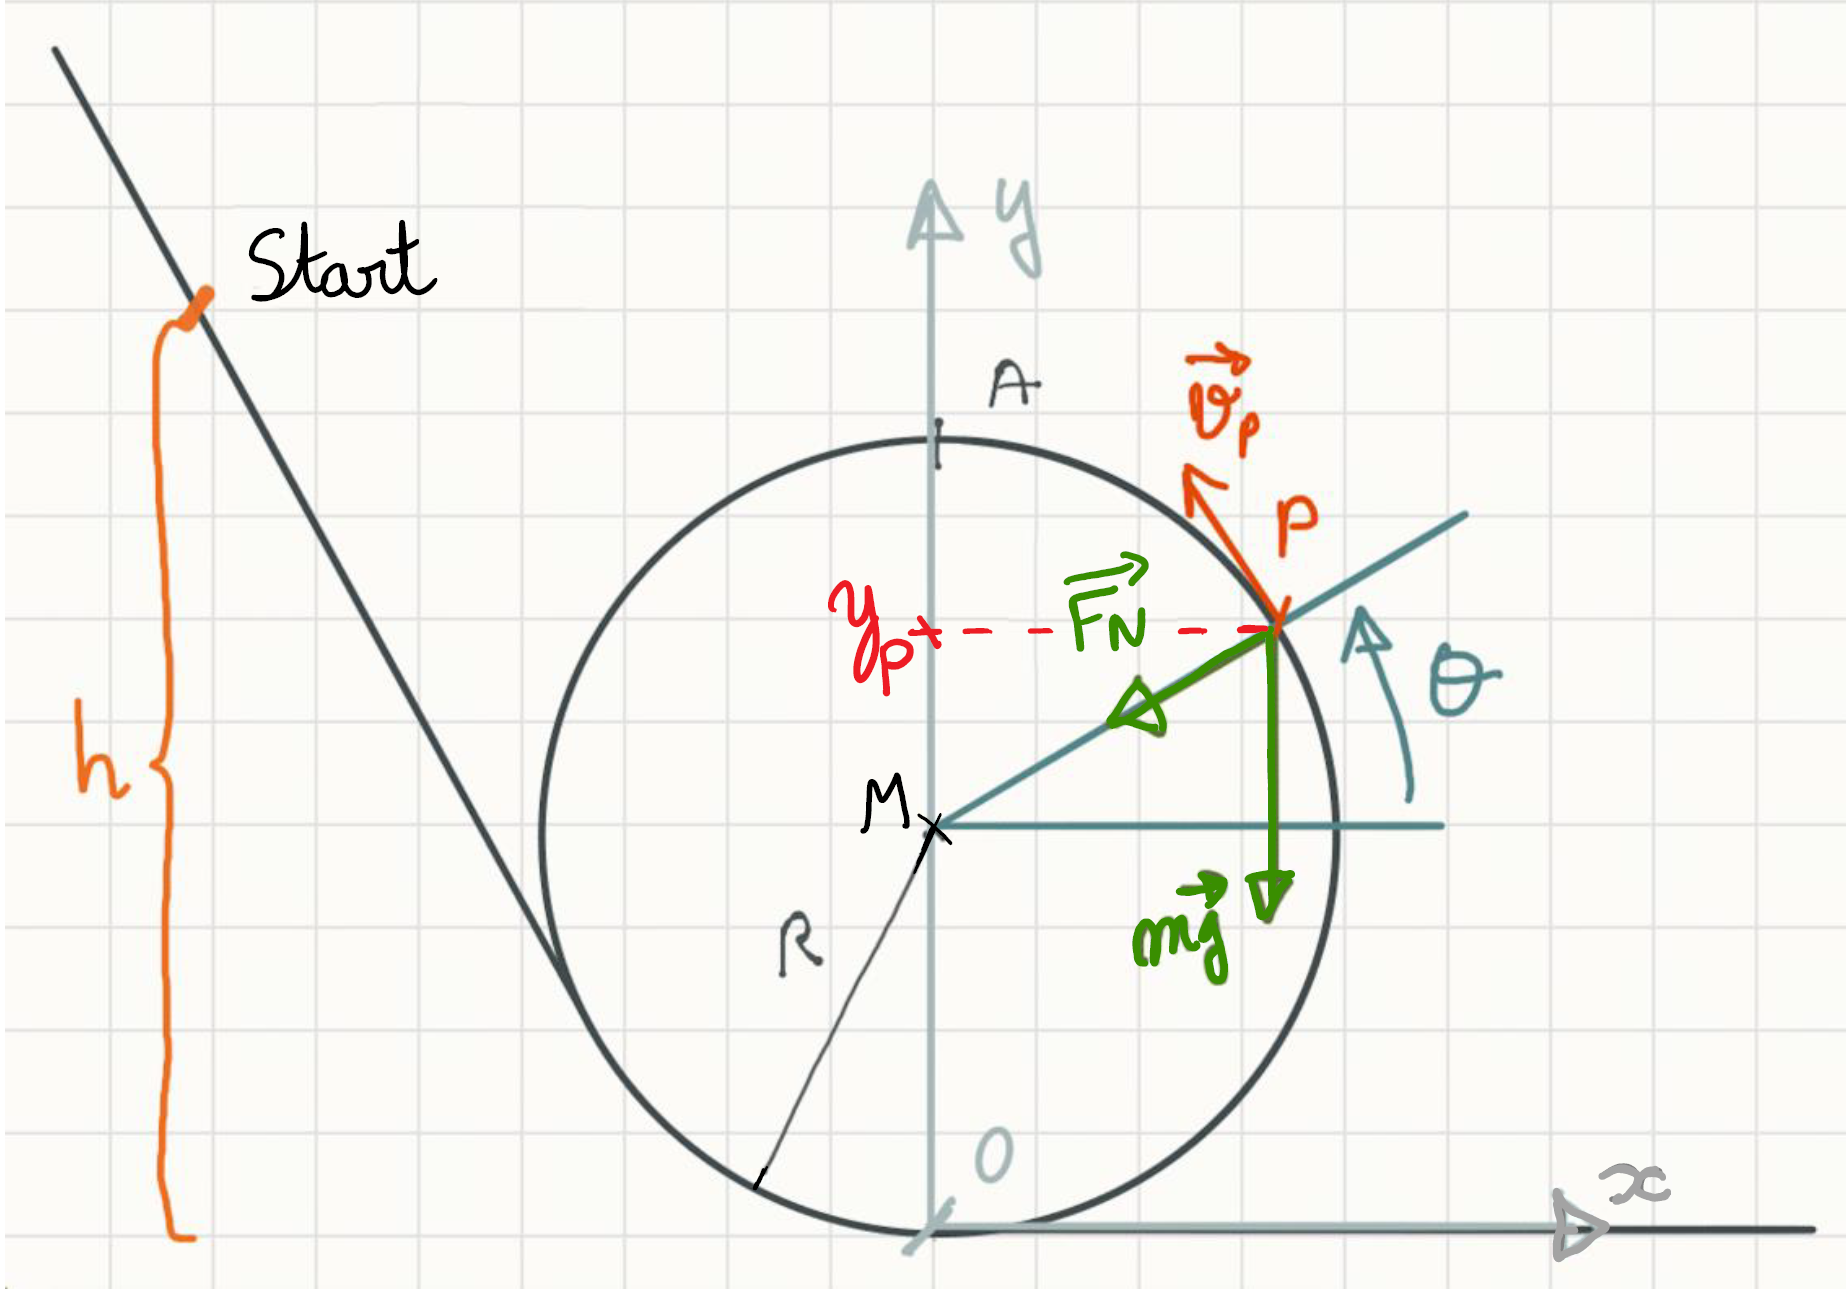

4. Vergleichen Sie Ihre Zeichnung mit dem Bild oben und stellen Sie den Unterschied fest. Fehlt etwas in Ihrer Zeichnung? Wenn ja, vervollständigen Sie Ihre Zeichnung, um sie so genau wie möglich zu machen.



In [45]:
 #Darstellen des Bildes
from IPython.display import Image
display(Image(filename='Rutsche1.png'))

 #Darstellen der Frage    
print('4. Vergleichen Sie Ihre Zeichnung mit dem Bild oben und stellen Sie den Unterschied fest. Fehlt etwas in Ihrer Zeichnung? Wenn ja, vervollständigen Sie Ihre Zeichnung, um sie so genau wie möglich zu machen.')

# Leerraum hinzufügen
print('')


## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* **[C. Details zu den Berechnungen](#C.Berechnungen)**
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      

# C. Details zu den Berechnungen <a class="anchor" id="C.Berechnungen"></a> ⚙️✏️



*Bevor Sie mit den Berechnungen beginnen, ist es wichtig, sich daran zu erinnern, was genau Sie berechnen möchten und welches Problem zu lösen ist. Es ist wichtig, sich auf eine Frage zu konzentrieren, sonst läuft man Gefahr, sich in alle Richtungen zu verlieren und keine konkreten Antworten zu finden.*   


Nachdem Sie nun die statische Situation an einem festen Punkt $P$ auf dem Papier modelliert haben, beginnen Sie mit dem nächsten Schritt des Denkprozesses und verwenden physikalische Gesetze und Berechnungen, um das gestellte Problem zu lösen.  

Erinnern Sie sich an das Problem, das Sie lösen wollen?


*Da das Problem komplexer ist als die statische Situation, die Sie zuvor gezeichnet haben, gibt es viele Schritte zu beachten.*
*Oft gibt es mehrere Möglichkeiten, ein Problem zu lösen.*  

**Frage❓**: Wie würden Sie die Flugbahn und ihre Abhängigkeit von der Starthöhe $h$ ermitteln? Beginnen Sie damit, Ihre Ideen und die notwendigen Schritte auf einem Blatt Papier zu sammeln.📝

## 1. Wir suchen die Norm von $v$ im Punkt P: $v_p$ . <a class="anchor" id="C1"></a>

### a) Berechnung ohne die Rotationsenergie der Kugel <a class="anchor" id="sub_section_C1A"></a>

**Fragen❓**: 
**1. Welches physikalische Prinzip können Sie anwenden, um den Betrag der Geschwindigkeit im Punkt P,  $v_p$, in Abhängigkeit von der Anfangshöhe ℎ zu bestimmen?**
*Führen Sie die Zelle unten aus um die Frage zu beantworten.*

In [46]:
#hide_code #run_cell
import ipywidgets as widgets
from IPython.display import display, clear_output

# Generieren und Darstellen der Antwortmöglichkeiten
selector = widgets.Dropdown(options=['Impulserhaltung',
                                         'Drehimpulserhaltung',
                                         'Energieerhaltung',
                                         '1. Newtonsches Gesetz (Trägheitsgesetz)',
                                     '2. Newtonsches Gesetz (Aktionsprinzip)',
                                     '3. Netownsches Gesetz (Wechselwirkungsprinzip)'], 
                                description='Prinzip:', disabled=False, value=None)
display(selector)

# Generieren des Buttons zum Ueberpruefen der Antwort
button = widgets.Button(description='Überprüfe Ergebnis', button_style='info', icon='')
output_button = widgets.Output()


# Funktion zur Beurteilung des Ergebnisses
def evaluate_result(button):
    selection = selector.get_interact_value()
    with output_button:
        if selection == 'Energieerhaltung':
            print('👍 Super, Ihre Antwort ist richtig.')
        else:
            print('❌ Probieren Sie es noch einmal.')
            print('Das gleiche Prinzip ergibt die Geschwindigkeit eines Steins beim Aufprall auf den Boden, nachdem er aus einer Höhe h fallen gelassen wurde.')
            
    # Loesche Textausgabe bei erneutem Klicken des Buttons
    output_button.clear_output(wait=True)

# Definition der Funktion, die beim Klick auf den Button ausgefuehrt wird
button.on_click(evaluate_result)

# Darstellung des Buttons
display(button,output_button)

Dropdown(description='Prinzip:', options=('Impulserhaltung', 'Drehimpulserhaltung', 'Energieerhaltung', '1. Ne…

Button(button_style='info', description='Überprüfe Ergebnis', style=ButtonStyle())

Output()

**2. Verwenden Sie das oben gefundene physikalische Prinzip, um $v_p$ als Funktion von h, 𝜃 und R, dem Radius des Kreises, zu berechnen.**     
*Gehen Sie zunächst von einer gleitenden Masse aus, nicht von einer rollenden, und vernachlässigen Sie die Reibung mit der Rutschbahn. Nehmen Sie eine Masse $m$ für die Murmel an.*

**a. Führen Sie Ihre Berechnung auf einem Blatt Papier durch.** 📝 $ \\  $
**b. Führen Sie dann die unten stehende Zellen aus, um zu sehen, ob der Computer das gleiche Ergebnis wie Sie findet.**

In [47]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
from sympy import*
import random
import sympy
printmd('Gesamtenergie im Anfangspunkt = Potentielle Energie im Anfangspunkt: $E_1=m g h $')
printmd('Gesamtenergie im Punkt P = Potentielle Energie + kinetische Energie in P: $E_2=m g y_p+ 1/2 \cdot m v_p² $ ')
printmd('Der Energieerhaltungssatz ergibt: $E_2=E_1$, also')
v_p = sympy.var('v_p')
m, g, h, y_p = sympy.symbols('m, g, h, y_p')
E= sympy.Eq(Rational(1, 2)*m*v_p**2 + m*g*y_p, m*g*h)

E

Gesamtenergie im Anfangspunkt = Potentielle Energie im Anfangspunkt: $E_1=m g h $

Gesamtenergie im Punkt P = Potentielle Energie + kinetische Energie in P: $E_2=m g y_p+ 1/2 \cdot m v_p² $ 

Der Energieerhaltungssatz ergibt: $E_2=E_1$, also

Eq(g*m*y_p + m*v_p**2/2, g*h*m)

In [48]:
printmd('Mathematisch gesehen ist diese Gleichung quadratisch und hat zwei Lösungen für $v_p$:')
sympy.solve(E,'v_p')

Mathematisch gesehen ist diese Gleichung quadratisch und hat zwei Lösungen für $v_p$:

[-sqrt(2)*sqrt(g*(h - y_p)), sqrt(2)*sqrt(g*(h - y_p))]

In [49]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
equation = r'$$\int_{{t=0}}^1 \frac{{1}}{{1+t^2}}\,\text{d}t$$'
printmd('In der Physik ist der Betrag einer Geschwindigkeit immer positiv, also wählen wir nur die positive Lösung:')
printmd(r'$$v_p= \sqrt{2g [h -y_p]}$$') 


In der Physik ist der Betrag einer Geschwindigkeit immer positiv, also wählen wir nur die positive Lösung:

$$v_p= \sqrt{2g [h -y_p]}$$

*Führen Sie die Zelle unten aus, um die nächste Frage zu entdecken und zu beantworten.*

In [50]:
from IPython.display import Markdown, display
from ipywidgets import Button, HBox, VBox


def printmd(string):
    display(Markdown(string))
printmd(' **3. Wie schreibt man $y_p$ als eine Funktion von $R$ und 𝜃 ?**' )
printmd('Sehen Sie sich die obige Abbildung der Situation an und finden Sie das **rechtwinklige Dreieck**, das durch den Punkt P, den Mittelpunkt des Kreises und eine vertikale Seite gebildet wird. *Das Dreieck erscheint in der Abbildung in blauer und grüner Farbe*.')
printmd("Die Höhe von P, $y_p$, ist gleich dem Abstand zwischen dem Boden und dem Mittelpunkt des Kreises plus dieser Länge $\overline{My_p}=L$.")
printmd('Um also $y_p=\overline{OM}+\overline{My_p}$ zu finden, muss zunächst die **vertikale Länge $\overline{My_p}=L$ des Dreiecks** bestimmt werden.')

b1 =widgets.Button(description='L=𝑅 cos𝜃', button_style='success')
b2 =widgets.Button(description='L=𝑅 sin𝜃', button_style='success')
b3 =widgets.Button(description='L=𝑅 tan𝜃', button_style='success')
output = widgets.Output()

display(HBox([b1, b2, b3]))
display(output)

def on_b1_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal.")
        output.clear_output(wait=True)
        


b1.on_click(on_b1_clicked)

def on_b2_clicked(b):
    with output:
        print("👍 Super, Ihre Antwort ist richtig.")
        output.clear_output(wait=True)
        


b2.on_click(on_b2_clicked)
              
def on_b3_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal.")
        output.clear_output(wait=True)
        


b3.on_click(on_b3_clicked)





 **3. Wie schreibt man $y_p$ als eine Funktion von $R$ und 𝜃 ?**

Sehen Sie sich die obige Abbildung der Situation an und finden Sie das **rechtwinklige Dreieck**, das durch den Punkt P, den Mittelpunkt des Kreises und eine vertikale Seite gebildet wird. *Das Dreieck erscheint in der Abbildung in blauer und grüner Farbe*.

Die Höhe von P, $y_p$, ist gleich dem Abstand zwischen dem Boden und dem Mittelpunkt des Kreises plus dieser Länge $\overline{My_p}=L$.

Um also $y_p=\overline{OM}+\overline{My_p}$ zu finden, muss zunächst die **vertikale Länge $\overline{My_p}=L$ des Dreiecks** bestimmt werden.

Output()

In [51]:
import ipywidgets as widgets
from IPython.display import Markdown, display, clear_output
def printmd(string):
    display(Markdown(string))
    

printmd("Was ist dann $y_p$ in Abhängigkeit von R und 𝜃 ? *Faktorisieren Sie Ihr Ergebnis.*" )

c = widgets.Button(
    description='Ergebnis',
    disabled=False,
    button_style='info',
    tooltip='Click me',
    icon='check'
)
display(c)

out = widgets.Output()
display(out)

def on_button_clicked(c):
    with out:
        clear_output()
        printmd('$ y_p= R  + R\sin 𝜃 =R \cdot ( 1 + \sin 𝜃) $' )
        
c.on_click(on_button_clicked)


Was ist dann $y_p$ in Abhängigkeit von R und 𝜃 ? *Faktorisieren Sie Ihr Ergebnis.*

Button(button_style='info', description='Ergebnis', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

Setzt man $y_p$ in die in Frage 2 gefundene Gleichung für $v_p$ ein, erhält man:
    $$v_p = \sqrt{2g[h - R ( 1 + \sin\theta)]}$$

### b) Berechnung mit der Rotationsenergie der Kugel <a class="anchor" id="sub_section_C1B"></a> 

In Wirklichkeit können wir unser Modell verbessern und die Berechnungen präziser machen. Die Murmel rollt und hat somit eine zusätzliche Rotationsenergie:$$ E_{Rot}=\frac{1}{2}I\omega_{p}^{2}$$
wobei $I$ das **Trägheitsmoment** ist und $  \omega_{p}$ die **Winkelgeschwindigkeit**.
$$\omega_p = \frac{v_p}{r}$$ wobei $r$ der Radius der Murmel ist.



Das Trägheitsmoment ist eine **Eigenschaft des Materials**. 
Für eine feste Kugel wie unsere Murmel beträgt es:

$$I = \frac{2}{5}\cdot m \cdot r^2$$



**Fragen: ❓ 1.Vereinfachen Sie die Gleichung für die obige Rotationsenergie und finden Sie $E_{Rot}$ nur als Funktion von $v_p$ und $m$.**

*Führen Sie die Zelle unten aus, um die Antwort zu entdecken.*

In [52]:
from sympy import*
import sympy
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('Die Rotationsenergie ist:')
I,  m, r, omega_p, v_p  = sympy.symbols('I,  m, r, omega_p, v_p ')
I = Rational(2, 5)*m*r**2
omega_p=v_p/r
E_rot=Rational(1, 2)*I*omega_p**2

simplify(E_rot)

Die Rotationsenergie ist:

m*v_p**2/5

**2. Wenden Sie nun den Energieerhaltungssatz an, um die neue verbesserte Funktion für $𝑣_𝑝$ in Abhängigkeit von h, 𝜃 und R zu finden.**

i) Führen Sie Ihre Berechnung auf einem Blatt Papier durch .📝 

ii) Führen Sie dann die unten stehenden Zellen aus, um zu sehen, ob der Computer das gleiche Ergebnis wie Sie findet.

In [53]:
from sympy import*
import random
import sympy
print('Nimmt man die in Frage C.a)2. gefundene Energieerhaltungsgleichung und fügt den Rotationsenergieterm hinzu, so erhält man:')
v_p = sympy.var('v_p')
m, g, h, y_p = sympy.symbols('m, g, h, y_p')
E_2= sympy.Eq(Rational(1, 2)*m*v_p**2 + m*g*y_p+Rational(1, 5)*m*v_p**2 , m*g*h)

E_2

Nimmt man die in Frage C.a)2. gefundene Energieerhaltungsgleichung und fügt den Rotationsenergieterm hinzu, so erhält man:


Eq(g*m*y_p + 7*m*v_p**2/10, g*h*m)

In [54]:
print('Mathematisch gesehen ist diese Gleichung quadratisch und hat zwei Lösungen:')
sympy.solve(E_2,'v_p')

Mathematisch gesehen ist diese Gleichung quadratisch und hat zwei Lösungen:


[-sqrt(70)*sqrt(g*(h - y_p))/7, sqrt(70)*sqrt(g*(h - y_p))/7]

In [55]:
from sympy import*
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('Wählt man den positiven Wert, da $v_p$ eine Geschwindigkeit ist, und setzt $y_p$ als Funktion von R und 𝜃 ein, so erhält man für $v_p$ :')
m, g, h, y_p, R= sympy.symbols('m, g, h, y_p, R')
t=sympy.Symbol("theta")
y_p=R*( 1 + sin(t))

simplify(sqrt(70)*sqrt(g*(h - y_p))/7)

Wählt man den positiven Wert, da $v_p$ eine Geschwindigkeit ist, und setzt $y_p$ als Funktion von R und 𝜃 ein, so erhält man für $v_p$ :

sqrt(70)*sqrt(g*(-R*(sin(theta) + 1) + h))/7


Für eine rollende Murmel ist die Geschwindigkeit im Punkt P also gleich: $v_p = \sqrt{\frac{10}{7}g[h - R(1 + \sin\theta)]}$.  $$ \\ $$  
 $$ \\ $$  


 


  <div style="border-style:solid ; border-width: 2px; border-color:navy; padding-left: 5px;">
     <span style="color:navy"> 
         
 <font size=4> <center> **Zusammenfassung** </center>
 <br />    Geschwindigkeit am Punkt P :
<br />
     <br />
     
  <font size=2>
      
Im Allgemeinen können wir das Ergebnis für $v_p$ aus Teil C.1.a) und Teil C.1.b) auch folgendermaßen schreiben:

$$v_p = \sqrt{A g[h - R(1 + \sin\theta)]}$$

*Dabei ist $A$ ein Faktor, der für ein rutschendes Objekt den Wert 2 hat, und $\frac{10}{7}$ für eine homogene Kugel, die rollt, ohne zu rutschen.*
         
</div></span> 



*Führen Sie die Zelle unten aus, um die nächste Frage zu entdecken, und beantworten Sie:*

In [56]:
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import display, clear_output, Markdown
import sympy

def printmd(string):
    display(Markdown(string))
printmd('**3. Ermitteln Sie nun die Komponenten $v_{p_x}$ und $v_{p_y}$ des Geschwindigkeitsvektors für P in der oberen rechten Ecke als Funktion des Betrag des Geschwindigkeitsvektors $v_{p}$ und 𝜃.**')
printmd('*Denken Sie daran, dass die Geschwindigkeit tangential zur Flugbahn ist, die hier kreisförmig ist.*')

# Generieren und Darstellen der Antwortmöglichkeiten
selector1 = widgets.Dropdown(options=['𝑣ₚ⋅sin𝜃',
                                         '𝑣ₚ⋅cos𝜃',
                                         '-𝑣ₚ⋅sin𝜃',
                                         '-𝑣ₚ⋅cos𝜃'], 
                                description='$v_{p_x}=$', disabled=False, value=None)

selector2 = widgets.Dropdown(options=['𝑣ₚ⋅sin𝜃',
                                         '𝑣ₚ⋅cos𝜃',
                                         '-𝑣ₚ⋅sin𝜃',
                                         '-𝑣ₚ⋅cos𝜃'], 
                                description='$v_{p_y}=$', disabled=False, value=None)
output = widgets.Output()

# Generieren des Buttons zum Ueberpruefen der Antwort
button = widgets.Button(description='Überprüfe Ergebnis', button_style='info', icon='')
output_button = widgets.Output()

display(HBox([selector1, selector2]))
display(output)


# Funktion zur Beurteilung des Ergebnisses
def evaluate_result(button):
    selection1 = selector1.get_interact_value()
    selection2 = selector2.get_interact_value()
    with output_button:
        if selection1 == '-𝑣ₚ⋅sin𝜃' and selection2 == '𝑣ₚ⋅cos𝜃':
            print('👍 Super, Ihre Antwort ist richtig.')
        else:
            print('❌ Probieren Sie es noch einmal.')
            print('Denken Sie daran, dass P im oberen rechten Viertel liegt und dies das Vorzeichen der Geschwindigkeitskomponenten beeinflusst.')
    # Loesche Textausgabe bei erneutem Klicken des Buttons
    output_button.clear_output(wait=True)

# Definition der Funktion, die beim Klick auf den Button ausgefuehrt wird
button.on_click(evaluate_result)

# Darstellung des Buttons
display(button,output_button)



**3. Ermitteln Sie nun die Komponenten $v_{p_x}$ und $v_{p_y}$ des Geschwindigkeitsvektors für P in der oberen rechten Ecke als Funktion des Betrag des Geschwindigkeitsvektors $v_{p}$ und 𝜃.**

*Denken Sie daran, dass die Geschwindigkeit tangential zur Flugbahn ist, die hier kreisförmig ist.*

Output()

Button(button_style='info', description='Überprüfe Ergebnis', style=ButtonStyle())

Output()

Der Geschwindigkeitsvektor bei P ist dann:

$$\vec v_p=\begin{pmatrix}v_{p_x} \\ v_{p_y}\end{pmatrix}$$
wobei $v_{p_x}$ und $v_{p_y}$ die oben ermittelten Werte haben.


## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * **[2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)**
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      

## 2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden. <a class="anchor" id="C2"></a> 

Um die Flugbahn weiter zu modellieren, müssen wir die Kräfte kennen, die auf die Murmel wirken.

**Fragen: ❓ 1. Welche beiden Kräfte wirken auf die Murmel? Vernachlässigen Sie aus Gründen der Modellierung die Reibungskräfte (aus der Luft und von der Rutsche).**
*Führen Sie die Zelle unten aus, um die nächste Frage zu entdecken.*

In [57]:
from IPython.display import Markdown, display
from ipywidgets import Button, HBox, VBox

def printmd(string):
    display(Markdown(string))
    
printmd('Wählen Sie zwei Antworten aus: ')
printmd('')

b1 =widgets.Button(description=' Gewicht: $\\vec{F_g} = m \\vec{g}$', button_style='success')
b2 =widgets.Button(description=' Normalkraft: $\\vec {F_N} $', button_style='success')
b3 =widgets.Button(description='Reibung: $ \\vec{F_R}=μ\\vec{F_N} $', button_style='success')
b4 =widgets.Button(description='Federkraft:$F=D Δx$', button_style='success')
b5 =widgets.Button(description='Coulomb:$F_c=k\\frac{q_1 q_2}{r^2}$', button_style='success')
output = widgets.Output()


display(HBox([b1, b2, b3, b4, b5]))
display(output)


def on_b1_clicked(b):
    with output:
        print("👍 Super, Ihre Antwort ist richtig. Wie so oft in der Mechanik ist das Gewicht die offensichtlichste Kraft.")
        output.clear_output(wait=True)
        


b1.on_click(on_b1_clicked)

def on_b2_clicked(b):
    with output:
        print("👍  Super, Ihre Antwort ist richtig. Es gibt ja die Reaktionskraft von der Rutsche auf die Murmel.")
        output.clear_output(wait=True)
        


b2.on_click(on_b2_clicked)
              
def on_b3_clicked(b):
    with output:
        print("❌ Denken Sie daran, dass wir beschlossen haben, die Reibungskraft zu vernachlässigen.")
        output.clear_output(wait=True)
        


b3.on_click(on_b3_clicked)

def on_b4_clicked(b):
    with output:
        print("❌ Bei diesem Problem gibt es keine Feder und somit auch keine Federkraft.")
        output.clear_output(wait=True)
        


b4.on_click(on_b4_clicked)
def on_b5_clicked(b):
    
    with output:
        print("❌ In unserem Problem gibt es kein äußeres elektrisches Feld und somit auch keine Coulomb-Kraft.")
        output.clear_output(wait=True)
        


b5.on_click(on_b5_clicked)





Wählen Sie zwei Antworten aus: 

Output()

Kräfte haben nicht nur einen Betrag, sondern auch eine Richtung.

**2. Welche Richtung haben diese beiden Kräfte ?**

*Führen Sie die Zelle unten aus, um die Antwort zu entdecken.*

In [58]:
import ipywidgets as widgets
from IPython.display import Markdown, display, clear_output
def printmd(string):
    display(Markdown(string))
    

c = widgets.Button(
    description='Ergebnis',
    disabled=False,
    button_style='info',
    tooltip='Click me',
    icon='check'
)
display(c)

out = widgets.Output()
display(out)

def on_button_clicked(c):
    with out:
        clear_output()
    
        printmd("Die zwei Kräfte sind das Gewicht $ \\vec{F_g} $ und die Reaktion der Rutsche $ \\vec{F_N}$.")
        printmd("$ \\vec{F_g} = m \cdot \\vec{g} = - m\cdot g \\vec{e_y} $ und $ \\vec{F_N} =  F_N  \cdot \\vec{n}$"    )
        printmd("wobei: $\\vec{e_y}$ der **Einheitsvektor** ist, der in **vertikaler Richtung nach oben** zeigt" )
        printmd("  und $\\vec{n}$ ein **Einheitsvektor** ist, der **senkrecht zur Rutschbahn** steht und **auf den Mittelpunkt des Kreises zeigt**. ")
        printmd("Die Rutsche \"schiebt\" die Murmel so, dass sie ihren Kurven folgt. Auf dem kreisförmigen Teil der Bahn ist die Reaktionskraft **zentripetal** (zum Mittelpunkt des Kreises hin). Folglich ist **$F_N$ positiv**. ")
        printmd("*$F_N<0$ würde bedeuten, dass die Rutschbahn die Kugel anzieht.*")
c.on_click(on_button_clicked)

Button(button_style='info', description='Ergebnis', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

**3. Was passiert mit der Murmel, wenn die Reaktionskraft $ \vec{F_N} $ verschwindet ?**                  *Denken Sie daran, dass die Reaktionskraft der Rutsche der Kraft entspricht, die von der Rutsche auf die Murmel ausgeübt wird.*

*Führen Sie die Zelle unten aus, um die nächste Frage zu entdecken.*

In [59]:
#hide_code #run_cell
import ipywidgets as widgets
from IPython.display import display,Markdown, clear_output
from ipywidgets import Button, HBox, VBox


def printmd(string):
    display(Markdown(string))

printmd("An dem Punkt der Flugbahn, an dem $ \\vec{F_N} =\\vec{0}$ ist, geschieht Folgendes:")


# Generieren und Darstellen der Antwortmöglichkeiten

a =widgets.Box(
    [
 widgets.RadioButtons(options=['A) Die Geschwindigkeit der Murmel nimmt plötzlich ab und sie bewegt sich weiter auf der Kreisbahn.' ,
                                         'B) Die Murmel bewegt sich weiter auf der Kreisbahn und ihre Geschwindigkeit bleibt erhalten.  ',
                                         'C) Die Murmel fällt nach unten, da dort nur die Gravitationskraft wirkt. Ihre Flugbahn ist jetzt nur noch abwärts gerichtet.',
                                         'D) Die Murmel verlässt die Kreisschleife und fällt mit einer parabolischen Flugbahn nach unten.'], 
                               
 layout={'width': 'max-content'}
        )
    ]
)
display(a)

    
    
    

# Generieren des Buttons zum Ueberpruefen der Antwort
b = widgets.Button(description='Überprüfe Ergebnis', button_style='info', icon='')
out= widgets.Output()


    
    




# Darstellung des Buttons
display(b,out)

def on_button_clicked(b):
    with out:
        clear_output()
        
        printmd(" Wenn die Reaktionskraft von der Rutsche auf die Murmel verschwindet ($ \\vec{F_N} =\\vec{0}$), gibt es keinen Kontakt mehr zwischen der Murmel und der Rutsche: Die Murmel verlässt die Schleife.")
        printmd(" An diesem Punkt **bricht unser Modell der Kreisbewegung zusammen!** ")
        printmd( "Die einzige Kraft, die übrig bleibt, ist die Gewichtskraft: Diese Bewegung wird als **schiefer Wurf oder schräger Wurf** bezeichnet, und die Murmel fällt mit einer **parabolischen Flugbahn** nach unten.  *Daher ist Antwort D) richtig.*") 
        

b.on_click(on_button_clicked)

An dem Punkt der Flugbahn, an dem $ \vec{F_N} =\vec{0}$ ist, geschieht Folgendes:

Box(children=(RadioButtons(layout=Layout(width='max-content'), options=('A) Die Geschwindigkeit der Murmel nim…

Button(button_style='info', description='Überprüfe Ergebnis', style=ButtonStyle())

Output()

</span>
    <div class="alert alert-block alert-info">
        
<font size="4">
     <center> <b> Schräger Wurf :</b> <center> <br />
         
<font size="2">
Für einen Schrägerwurf gibt es nur eine Kraft, das Gewicht und eine Anfangsgeschwindigkeit mit zwei Komponenten : $v_{0x}$ und $v_{0y}$.   
    
In **horizontaler Richtung** ist die Position des Objekts: $x=x_0+v_{0x}\cdot t  $ &nbsp; (1)
   
Entlang der vertikalen Achse (nach oben zeigend) ist die Beschleunigung des Objekts: $a_y=-g $  &nbsp; (2)<br />
   Durch Integrieren erhält man: $v_y= v_{0y}-g \cdot t $              &nbsp;   &nbsp;        (3) <br /> 
     Erneutes Integrieren ergibt:    $y= y_0+v_{0y} \cdot t - \frac{1}{2}g \cdot t² $  &nbsp; (4) <br />
    
Da die **parabolische Bewegung an dem Punkt P der Schleife beginnt**, an dem die Murmel die Schleife verlässt, nehmen wir unser vorheriges Ergebnis für $$\vec v_p=\begin{pmatrix}-v_p\sin\theta  \\ v_p\cos\theta \end{pmatrix}$$
 als unsere **Anfangsgeschwindigkeit**. Daher ist $v_{0x}=-𝑣ₚ⋅\sin \theta$. <br />
    
Die **Anfangsposition** entspricht auch der Position dieses **Punktes P$(x_0, y_0)$ : $x_0=R \cos \theta $ und $y_0=R (1+\sin \theta)$**.

Aus Gleichung (1) und (4) ergibt sich dann die Position der Murmel, **nachdem sie die Schleife verlassen hat**: $$\vec r_p=\begin{pmatrix}x  \\ y \end{pmatrix}=\begin{pmatrix}-v_p\sin\theta \, t + R \cos \theta \\-\frac{1}{2} g t^2 + v_p\cos\theta \, t 
+ R (1+\sin \theta)
\end{pmatrix}$$
    
    
***Im letzten Diagramm, am Ende dieses Notebook werden wir diese Flugbahn einzeichnen.***
 

**4. Welches physikalische Prinzip können Sie anwenden, um den Betrag der  Reaktionskraft $ \vec{F_N} $ im Punkt P, in Abhängigkeit von der Anfangshöhe ℎ, m, R und 𝜃  zu bestimmen?**
*Führen Sie die Zelle unten aus um die Frage zu antworten.*

In [20]:
#hide_code #run_cell
import ipywidgets as widgets
from IPython.display import Markdown, display, clear_output

def printmd(string):
    display(Markdown(string))

printmd("Um den Wert von $ \\vec{F_N} $ zu berechnen, wird das folgende Prinzip verwendet:")
# Generieren und Darstellen der Antwortmöglichkeiten
selector = widgets.Dropdown(options=['Impulserhaltung',
                                         'Drehimpulserhaltung',
                                         'Energieerhaltung',
                                         '1. Newtonsches Gesetz (Trägheitsgesetz)',
                                     '2. Newtonsches Gesetz (Aktionsprinzip)',
                                     '3. Netownsches Gesetz (Wechselwirkungsprinzip)'], 
                                description='', disabled=False, value=None)
display(selector)

# Generieren des Buttons zum Ueberpruefen der Antwort
button = widgets.Button(description='Überprüfe Ergebnis', button_style='info', icon='')
output_button = widgets.Output()


# Funktion zur Beurteilung des Ergebnisses
def evaluate_result(button):
    selection = selector.get_interact_value()
    with output_button:
        if selection == '2. Newtonsches Gesetz (Aktionsprinzip)':
            printmd('👍 Super, Ihre Antwort ist richtig. Dieses Gesetz lautet: $ \sum \\vec{F} = m \cdot \\vec{a} $')
        else:
            print('❌ Probieren Sie es noch einmal.')
            print('Das gesuchte Prinzip verknüpft die auf ein Objekt ausgeübte Gesamtkraft mit seiner Beschleunigung.')
            
    # Loesche Textausgabe bei erneutem Klicken des Buttons
    output_button.clear_output(wait=True)

# Definition der Funktion, die beim Klick auf den Button ausgefuehrt wird
button.on_click(evaluate_result)

# Darstellung des Buttons
display(button,output_button)

Um den Wert von $ \vec{F_N} $ zu berechnen, wird das folgende Prinzip verwendet:

Dropdown(options=('Impulserhaltung', 'Drehimpulserhaltung', 'Energieerhaltung', '1. Newtonsches Gesetz (Träghe…

Button(button_style='info', description='Überprüfe Ergebnis', style=ButtonStyle())

Output()

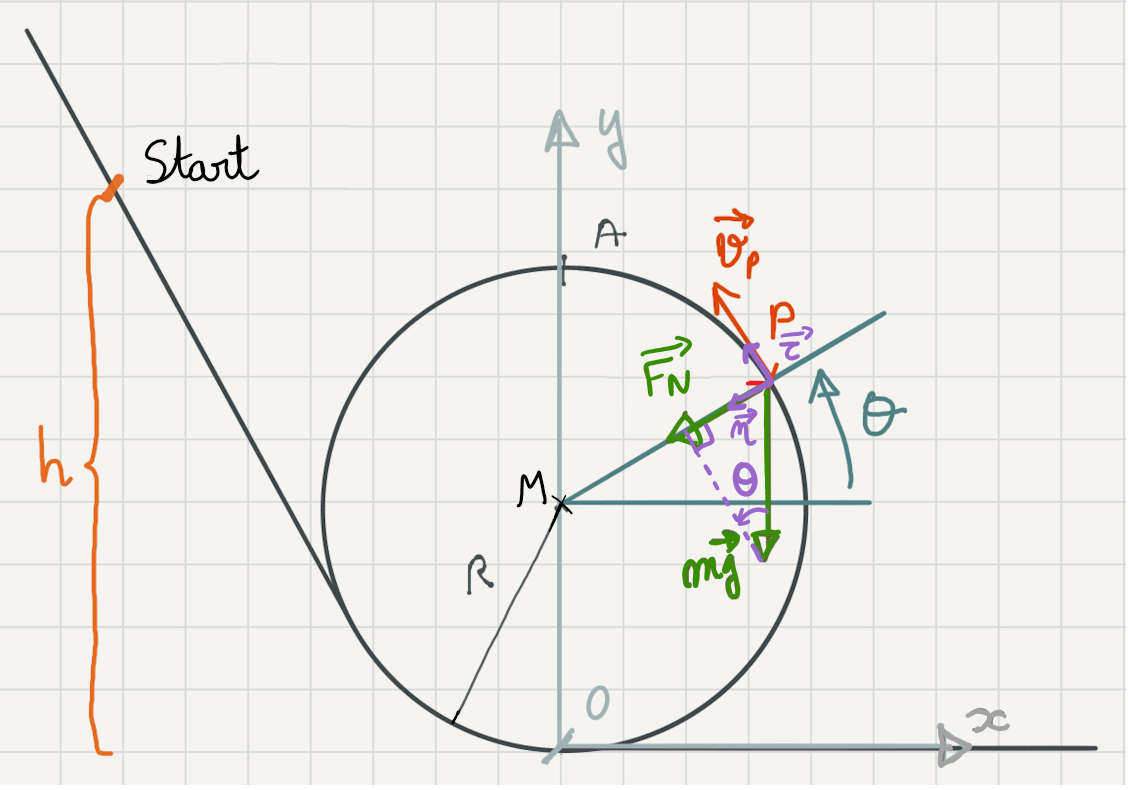

In [21]:
 #Darstellen des Bildes
from IPython.display import Image
display(Image(filename='Rutsche2.png'))


## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * **[3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)**
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      


## 3. Anwendung des zweiten Newtonschen Gesetzes  <a class="anchor" id="C3"></a> 

Wenden wir nun das zweite Newtonsche Gesetz am Punkt P an,  $$ \sum \vec F = m \vec a . $$ Wir führen zwei neue Vektoren ein (violett auf dem obigen Bild), in die wir die Kraftvektoren und den Beschleunigungsvektor zerlegen werden.

    
   &nbsp;      **1. Die Beschleunigung  $ \vec a  $:**

Auf der Kreisschleife kann die Beschleunigung in zwei senkrechte Achsen zerlegt werden:

_die $n-Achse$ ist von P zum Punkt M gerichtet (zentripetal, Richtung $\vec n$)  

_die $\tau-Achse$ verläuft tangential zur Flugbahn (in Richtung $\vec v_p$ und  $\vec \tau $).

Die Zerlegung des Vektors  $ \vec a  $ in zwei Komponenten ergibt:  $ \vec a= a_n \vec n + a_\tau \vec \tau  $

Als Regel für die Kreisbewegung gilt für die Zentripetalbeschleunigung: $a_n =\frac{v_p^2}{R}$.

Die tangentiale Beschleunigungskomponente $a_\tau$ ist einfach die Ableitung der tangentialen Geschwindigkeit: $ a_\tau = \left ( \frac{\mathrm{d} v_P}{\mathrm{d} t} \right ) .$


   &nbsp;      **2. Die Kraft $\vec F$:**
   
**An welchem Punkt verlässt der Murmel den Looping?** Die Beantwortung von diese Frage ist **gleichbedeutend** mit der Feststellung, an welchem Punkt die Reaktionskraft, **$F_N \vec{n}$, verschwunden ist**.
    Dazu wird nur die Normalkomponente der Gesamtkraft, $F_n\vec{n}$, benötigt: $$F_n=F_N+ F_{gn}$$  Hier **$ F_{gn}$ ist die Normalkomponente der Gewichtskraft**: $ \vec{F_g}= F_{gn} \vec n +  F_{g\tau} \vec \tau  $ 
    
*Führen Sie die Zelle unten aus, um die nächste Frage zu entdecken.*

In [60]:

from IPython.display import Markdown, display
from ipywidgets import Button, HBox, VBox

def printmd(string):
    display(Markdown(string))

printmd('Was ist $F_{gn}$?')
printmd(' *Betrachten Sie die **obige Abbildung** und wenden Sie die Trigonometrie im Inneren des **kleinen Dreiecks** mit einer Seite der Länge $m ・g$ an (gebildet durch die **grünen und gestrichelten violetten** Linien in der Abbildung)* ')
printmd('Klicken Sie auf die richtige Antwort:')

b1 =widgets.Button(description=' $F_{gn}  = m ・g$ ', button_style='success')
b2 =widgets.Button(description=' $F_{gn}  = m ・g・cos (θ)$', button_style='success')
b3 =widgets.Button(description='$F_{gn}  = -mg・cos (θ)$', button_style='success')
b4 =widgets.Button(description='$F_{gn}  = m ・g・sin (θ)$', button_style='success')
b5 =widgets.Button(description='$F_{gn}  = -m ・g・sin (θ)$', button_style='success')
output = widgets.Output()


display(HBox([b1, b2, b3, b4, b5]))
display(output)


def on_b1_clicked(b):
    with output:
        printmd("❌ Vergessen Sie nicht, die Gesamtgewichtskraft $ m \\vec{g} $ auf die $n-Achse$ zu projizieren.")
        printmd(""" Achten Sie auf die Richtung der $n-$ und $\\tau-$Achse: <br /> 
        •wenn der Vektor  $\\vec{F_{gn}}  $ in dieselbe Richtung wie der Vektor $\\vec n$  (bzw. der Vektor $\\vec \\tau$) geht 
        → positive $F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente
        <br /> •wenn der Vektor $\\vec{F_{gn}}  $  in die zum Vektor  $\\vec n$ (bzw. Vektor $\\vec \\tau$) entgegengesetzte Richtung geht
        → negative $ F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente
        """ )

        output.clear_output(wait=True)
        


b1.on_click(on_b1_clicked)

def on_b2_clicked(b):
    with output:
        printmd("""❌ Sind Sie sicher, dass die richtige trigonometrische Funktion verwendet wurde (Sinus bzw. Cosinus)? 
        Achten Sie auf das Vorzeichen; Es entspricht der Richtung der Projektion der Gewichtskraft $ F_{gn}:$
        <br />  •wenn der Vektor  $\\vec{F_{gn}}  $ in dieselbe Richtung wie der Vektor $\\vec n$  (bzw. der Vektor $\\vec \\tau$) geht 
        → positive $F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente
        <br /> •wenn der Vektor $\\vec{F_{gn}}  $  in die zum Vektor  $\\vec n$ (bzw. Vektor $\\vec \\tau$) entgegengesetzte Richtung geht
        → negative $ F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente""")
        output.clear_output(wait=True)
        


b2.on_click(on_b2_clicked)
              
def on_b3_clicked(b):
    with output:
        printmd("""❌ Sind Sie sicher, dass die richtige trigonometrische Funktion verwendet wurde (Sinus bzw. Cosinus)? 
        Achten Sie auf das Vorzeichen; Es entspricht der Richtung der Projektion der Gewichtskraft $ F_{gn}:$
        <br />  •wenn der Vektor  $\\vec{F_{gn}}  $ in dieselbe Richtung wie der Vektor $\\vec n$  (bzw. der Vektor $\\vec \\tau$) geht 
        → positive $F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente
        <br /> •wenn der Vektor $\\vec{F_{gn}}  $  in die zum Vektor  $\\vec n$ (bzw. Vektor $\\vec \\tau$) entgegengesetzte Richtung geht
        → negative $ F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente""")
        output.clear_output(wait=True)


b3.on_click(on_b3_clicked)

def on_b4_clicked(b):
    with output:
        printmd("👍  Super, Ihre Antwort ist richtig. Der Gewichtsvektor wurde korrekt auf die $n-Achse$ projiziert!")
        output.clear_output(wait=True)
        


b4.on_click(on_b4_clicked)
def on_b5_clicked(b):
    
    with output:
        printmd("""❌ Sind Sie sicher, dass die richtige trigonometrische Funktion verwendet wurde (Sinus bzw. Cosinus)? 
        Achten Sie auf das Vorzeichen; Es entspricht der Richtung der Projektion der Gewichtskraft $ F_{gn}:$
        <br />  •wenn der Vektor  $\\vec{F_{gn}}  $ in dieselbe Richtung wie der Vektor $\\vec n$  (bzw. der Vektor $\\vec \\tau$) geht 
        → positive $F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente
        <br /> •wenn der Vektor $\\vec{F_{gn}}  $  in die zum Vektor  $\\vec n$ (bzw. Vektor $\\vec \\tau$) entgegengesetzte Richtung geht
        → negative $ F_{gn}  $  (bzw. $F_{g\\tau}  $ ) Komponente""")
        output.clear_output(wait=True)


b5.on_click(on_b5_clicked)











Was ist $F_{gn}$?

 *Betrachten Sie die **obige Abbildung** und wenden Sie die Trigonometrie im Inneren des **kleinen Dreiecks** mit einer Seite der Länge $m ・g$ an (gebildet durch die **grünen und gestrichelten violetten** Linien in der Abbildung)* 

Klicken Sie auf die richtige Antwort:

Output()

&nbsp;      **3. Die Gleichung  für $𝐹_𝑁$:**

Wir wenden nun das 2. Newton'sche Gesetz nur auf der $n-Achse$ an und lösen für $\vec F_N$:

$$F_n= m \cdot a_n$$  da $F_n=F_N+ m g \sin \theta $ und $a_n=\frac{v_P^2}{R}$ impliziert dies:

$$m g \sin \theta  + F_N = m \frac{v_P^2}{R}$$ so

$$F_N= m \cdot (\frac{v_P^2}{R} - g \sin \theta)$$
Das Ersetzen durch die zuvor gefundene Formel für $ v_{_P} = \sqrt{A g[h - R(1 + \sin\theta)]}$  ergibt:

$$F_N= m g \Big(A \frac{h}{R} - A (1 + \sin\theta) -  \sin \theta \Big)$$




 


  <div style="border-style:solid ; border-width: 2px; border-color:navy; padding-left: 5px;">
     <span style="color:navy"> 
         
 <font size=4>    <center> **Zusammenfassung** </center>
   <br />  
     Reaktionskraft am Punkt P in der oberen rechten Ecke ($ 0 \leq \theta \leq \frac{\pi}{2} $ ) :

   
     
  <font size=2>
      


$$F_N= m g \Big(A \frac{h}{R} - A (1 + \sin\theta) -  \sin \theta \Big)$$

*Dabei ist $A$ ein Faktor, der für ein rutschendes Objekt den Wert 2 hat, und $\frac{10}{7}$ für eine homogene Kugel, die rollt, ohne zu rutschen.*
         
</div></span> 



## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * **[4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)**
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      

## 4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt  <a class="anchor" id="C4"></a> 



Lösen wir nun die Gleichung $F_N=0$ in der oberen rechten Ecke.

###  a) Wie groß ist die minimale Höhe h, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet? <a class="anchor" id="sub_section_4A"></a>
Betrachten wir nun einen festen Punkt P mit einem festen Winkel $\theta$.

Wählen wir $\theta$ so, dass die Murmel an diesem Punkt abhebt. Wie hoch muss die Anfangshöhe sein, damit das passiert?

*Führen Sie die folgende Zelle aus, um die Gleichung für ein festes $\theta$ zu lösen.*

In [24]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
from sympy import*
import random
import sympy
printmd('Zur Beantwortung wählen wir h als Variable und halten 𝜃 fest.')
printmd('Für ein festes 𝜃 und für $F_N=0$ ist $h$ gleich:')
m, g, h, R, A, 𝜃 = sympy.symbols('m, g, h, R, A, 𝜃')
F= sympy.Eq( m*g*(𝐴*ℎ/𝑅-𝐴*(1+sin(𝜃))-sin(𝜃)), 0)
F
sympy.solve(F,h)

Zur Beantwortung wählen wir h als Variable und halten 𝜃 fest.

Für ein festes 𝜃 und für $F_N=0$ ist $h$ gleich:

[R*(A*sin(𝜃) + A + sin(𝜃))/A]

Die Lösung für *h* lautet damit: $h= R \cdot (1+sin(𝜃) + \frac{sin(𝜃)}{A})$.

An den Punkten, an denen $F_N$ Null wird, verliert die Murmel den Kontakt zur Schleife: Die Murmel hebt ab.

 **Anwendung und Frage:** ❓ Im Experiment R=11.67 cm und $A= \frac{10}{7}$. Wie hoch muss die Murmel sein, damit sie unter dem Winkel $\theta = \frac{\pi}{4}=45° $ abhebt ?

*Führen Sie die Zelle unten aus, um die Antwort zu entdecken.*

In [25]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
# Die Funktion h definieren
def h(A, R, 𝜃):
 
 c=R*(A*sin(𝜃) + A + sin(𝜃))/A 
 return c
printmd('Die Anfangshöhe (in cm), damit die Murmel die Rutsche im Winkel $𝜃=45° $ verlässt, ist: ')
# Die Funktion h ausführen
print('h=', h(10/7, 11.62, float(pi)/4), 'cm')

Die Anfangshöhe (in cm), damit die Murmel die Rutsche im Winkel $𝜃=45° $ verlässt, ist: 

h= 25.5881873555591 cm




### b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?  
<a class="anchor" id="sub_section_4B"></a>

Zur Beantwortung ändern wir unsere Variable in der Funktion $F_N$ von $h$ in 𝜃.

Dazu ändern wir den Parameter in der Funktion simpy.solve.

*Führen Sie die Zelle unten aus, um die Antwort zu entdecken.*


In [198]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
from sympy import*
import random
import sympy
printmd('Für ein festes $h$ und für $F_N=0$, gibt es 2 Lösungen für 𝜃:')

𝜃 = sympy.var('𝜃')
m, g, h, R, A = sympy.symbols('m, g, h, R, A')
F= sympy.Eq( m*g*(𝐴*ℎ/𝑅-𝐴*(1+sin(𝜃))-sin(𝜃)), 0)
sympy.solve(F,'𝜃')



Für ein festes $h$ und für $F_N=0$, gibt es 2 Lösungen für 𝜃:

[asin(A*(R - h)/(R*(A + 1))) + pi, asin(A*(-R + h)/(R*(A + 1)))]



 
</span>
    <div class="alert alert-block alert-info">
        
<font size="2">
   <center> <b>Arkussinus Funktion und Lösung for $\theta$:</b> <center> <br />
       
    
Die Funktion Arkussinus ist so definiert, dass $arcsin(x) \in [-\frac{\pi}{2}, \frac{\pi}{2}]$ und ist nur gültig für $x \in [-1, 1]$ .
    
Da wir P in der oberen rechten Ecke gewählt haben, wollen wir $\theta \in [0, \frac{\pi}{2}]$ .
Für die erste Lösung $ \theta= arcsin(A \cdot (R - h)/[R\cdot(A + 1)]) + \pi \in [\frac{\pi}{2}, \frac{2\pi}{3}]$ und somit wäre  $\theta$ nicht in der rechten oberen Ecke, wie wir es gewählt haben: Die erste Lösung ist nur gültig für $ \theta= arcsin(A\cdot(R - h)/[R\cdot(A + 1)]) + \pi= \frac{\pi}{2}$.

Wir wenden uns nun der zweiten Lösung zu:  $$\theta =arcsin[A \cdot (-R + h)/(R \cdot (A + 1))] $$
Da $\frac{A \cdot (-R + h)}{[R \cdot (A + 1)]} \in [-1, 1]$ sein muss, **gilt diese Lösung nur für ein h**, das **nicht zu hoch** ist, damit der Looping nicht abgeschlossen wird, und **nicht zu niedrig** ist, damit die Kugel hoch genug kommt, bevor sie den Looping verlässt. 
    


    
    




 <div style="border-style:solid ; border-width: 2px; border-color:navy; padding-left: 5px;">
     <span style="color:navy"> 
         
 <font size=4>    <center> **Zusammenfassung** </center> <br />
     Lösung für $F_N=0$ bei festem $h$ oder festem $\theta$ mit $0 \leq \theta \leq \frac{\pi}{2}$ unter Berücksichtigung der Rollbewegung der Murmel ($A=\frac{10}{7}$):
<br />
     <br />
     
  <font size=4>
      
a) Damit die Murmel den Looping in einem bestimmten Winkel $\theta$ ( $\theta \leq \frac{\pi}{2}$ ) verlässt, muss für die Starthöhe gelten: 
       $$h= R \cdot (1+sin(𝜃) + \frac{sin(𝜃)}{A})= R \cdot [1+1.7 sin(𝜃)] $$ 

      
b) Bei einer Starthöhe $h$ verlässt die Murmel die Schleife in einem Winkel $\theta$:
$$\theta =arcsin[A \cdot (-R + h)/(R \cdot (A + 1)]=arcsin[\frac{10}{17} (\frac{ h}{R}-1)] $$

         
</div></span> 
  <font size=4>
      
      


### c) Spezielle Punkte <a class="anchor" id="sub_section_4C"></a>

*Um die Bewegung der Murmel besser zu untersuchen und besser zu verstehen, wann sie die Rutsche verlässt, wollen wir nun zwei spezielle Punkte auf der Kreisschleife untersuchen : $\theta=0$ und $\theta=\frac{\pi}{2}$.*

   **Fall 1: P mit $(y_p=R , \theta =0)$**

Der Punkt auf der rechten Seite des Kreises $(y_p=R , \ \theta =0)$ ist sehr speziell.
Wenn es an diesem Punkt keine Reaktionskraft mehr gibt ($F_N=0$ ), wird die Geschwindigkeit $v_P$ Null und die Murmel geht zurück nach unten.

**Frage ❓: Wie groß ist die Anfangshöhe h, bei der dies der Fall ist?**

Verwenden Sie zur Beantwortung den **Energieerhaltungssatz und Ihre Intuition** oder die **obige Funktion für h** für ein festes 𝜃.

*Führen Sie die Zelle unten aus, um die möglichen Antworten zu entdecken.*

In [199]:
from IPython.display import display
from IPython.display import Markdown, display
from ipywidgets import Button, HBox, VBox

def printmd(string):
    display(Markdown(string))
    

printmd(' Wie groß ist die Anfangshöhe h, so dass $F_N=0$ im Punkt P, wo $ 𝜃=0 $?')

b1 =widgets.Button(description=' h=𝑅 +  R\A', button_style='success')
b2 =widgets.Button(description= 'h=2𝑅 +  R\A'  , button_style='success')
b3 =widgets.Button(description='h= R\A', button_style='success')
b4 =widgets.Button(description='h=𝑅 ', button_style='success')
b5 =widgets.Button(description='h=𝑅 +A・R', button_style='success')
output = widgets.Output()

display(HBox([b1, b2, b3, b4, b5]))
display(output)

def on_b1_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].")
        output.clear_output(wait=True)
        


b1.on_click(on_b1_clicked)

def on_b2_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].")
        output.clear_output(wait=True)
        


b2.on_click(on_b2_clicked)
              
def on_b3_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].")
        output.clear_output(wait=True)
        


b3.on_click(on_b3_clicked)

def on_b4_clicked(b):
    with output:
        printmd("👍  Super, Ihre Antwort ist richtig. Die Gesamtenergie bleibt erhalten, d.h. wenn die Kugel mit einer Höhe R startet, wird sie auch ihre maximale Höhe R erreichen (für den perfekten Fall ohne Reibung). ")
        printmd("**Mit Reibung** würde die Murmel etwas Energie verlieren und nur eine **Höhe unter R** erreichen.")
        printmd("Wenn man die vorherige Gleichung für h mit **$ sin(𝜃)=0 $** verwendet, ergibt sich ebenfalls h=R.")
    output.clear_output(wait=True)
        


b4.on_click(on_b4_clicked)
def on_b5_clicked(b):
    
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].") 
        output.clear_output(wait=True)
        


b5.on_click(on_b5_clicked)


 Wie groß ist die Anfangshöhe h, so dass $F_N=0$ im Punkt P, wo $ 𝜃=0 $?

Output()


   **Fall 2: P mit $(y_p=2R , \theta =\frac{\pi}{2})$**
   
   Der höchste Punkt, für den unsere Gleichungen gelten (P befindet sich in der oberen rechten Ecke), liegt im oberen Teil des Kreises ($y_p =2 R$ und $\theta =\frac{\pi}{2}$).
   Wenn die Murmel zu diesem Zeitpunkt noch in Kontakt mit der Rutsche ist $(F_N>0)$, wird sie die gesamte Schleife vollenden!
   
   **Frage ❓: Wie groß ist die Höhe $h=h_{min}$ , für die $F_N=0$ in unserem speziellen Punkt P ($ \theta=\frac{\pi}{2}$) ?**
   
***Für $h>h_{min} $ wird die Murmel dann immer die Schleife vollenden!***

Verwenden Sie zur Beantwortung erneut die **Gleichung für h als Funktion von $\theta$**.

*Führen Sie die Zelle unten aus, um die möglichen Antworten zu entdecken.*

In [200]:
from IPython.display import display
from IPython.display import Markdown, display
from ipywidgets import Button, HBox, VBox

def printmd(string):
    display(Markdown(string))
   

printmd(' Wie groß ist die Anfangshöhe h, so dass $F_N=0$ im Punkt P, wo $ 𝜃=𝜋/2 $?')

b1 =widgets.Button(description=' h=𝑅 +  R\A', button_style='success')
b2 =widgets.Button(description= 'h=2𝑅 +  R\A'  , button_style='success')
b3 =widgets.Button(description='h= R\A', button_style='success')
b4 =widgets.Button(description='h=𝑅 ', button_style='success')
b5 =widgets.Button(description='h=𝑅 +A・R', button_style='success')
output = widgets.Output()

display(HBox([b1, b2, b3, b4, b5]))
display(output)

def on_b1_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].")
        output.clear_output(wait=True)
        


b1.on_click(on_b1_clicked)

def on_b2_clicked(b):
    with output:
        printmd("👍  Super, Ihre Antwort ist richtig. Wenn man die vorherige Gleichung für h mit **$ sin(𝜃)=1 $** verwendet, ergibt sich ebenfalls h=2𝑅 +  R\A.")
        output.clear_output(wait=True)
        


b2.on_click(on_b2_clicked)
              
def on_b3_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].")
        output.clear_output(wait=True)
        


b3.on_click(on_b3_clicked)

def on_b4_clicked(b):
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].") 
    output.clear_output(wait=True)
        


b4.on_click(on_b4_clicked)
def on_b5_clicked(b):
    
    with output:
        print("❌ Probieren Sie es noch einmal. Verwenden Sie h=[R*(A*sin(𝜃) + A + sin(𝜃))/A)].") 
        output.clear_output(wait=True)
        


b5.on_click(on_b5_clicked)


 Wie groß ist die Anfangshöhe h, so dass $F_N=0$ im Punkt P, wo $ 𝜃=𝜋/2 $?

Output()


  
 <div style="border-style:solid ; border-width: 2px; border-color:navy; padding-left: 5px;">
     <span style="color:navy"> 
         
 <font size=4> <center> **Zusammenfassung** </center>
     
Im Experiment ist $R= 11,62$ cm. Die Murmel rollt, es gilt also: $A=\frac{10}{7}$.<br />
 Die minimale Höhe $h_{min}$, ab der die Schleifenbildung bei unserem Modell abgeschlossen ist, ist:
<br />
     
     
  <font size=2>
      
$h_{min}= 2R+R/A= 2.7 R$ also $h_{min}=31.374 \ \text{cm}$.

         
</div></span> 

Überprüfen wir diese Antwort für $h_{min}$, um zu sehen, ob sie mit dem realen Experiment übereinstimmt. Sie können sich das Video in der Zelle unten ansehen:

In [201]:
#hide_code #run_cell
import ipywidgets as widgets
from IPython.display import display,Markdown, clear_output
from ipywidgets import Button, HBox, VBox

def printmd(string):
    display(Markdown(string))
    
    
# Input
height_label = Label('Wählen Sie eine Anfangshöhe:')
height_input = widgets.Dropdown(options=['h1', 'h3', 'h5'], value=None, 
disabled=False,)

# Output
text_output = widgets.Output()
video_output = widgets.Output()
with video_output: print("Das Video wird hier angezeigt.")

def height_event_handler(change):
     # Den Namen des ausgewählten Videos abrufen
    h = change.new

     # Outputs löschen
    text_output.clear_output()
    video_output.clear_output()

     # Daten aus dem Video importieren
    df_vid = pd.read_csv('data_bille/'+h+'-data.csv', index_col=0)
    df_vid = df_vid.rename({'VideoAnalysis: X (cm)': 'x', 
'VideoAnalysis: Y (cm)':'y', 'VideoAnalysis: X Velocity (cm/s)':'v_x', 
'VideoAnalysis: Y Velocity (cm/s)':'v_y'},
                            axis='columns')

     # Berechnen Sie die Anfangshöhe.
    y_min_vid = df_vid['y'].min()
    h_init = df_vid['y'].iloc[0] - y_min_vid

    R = 11.62

     # Zeige die Anfangshöhe an.
    with text_output:
        print('Ausgewählte Anfangshöhe: {} = {:0.2f}[cm]={:0.2f} R mit R=11.62cm'.format(h,h_init, h_init/R))
        
         # Video anzeigen
    with video_output:
        display(Video('data_bille/{}-dots.mov'.format(h)))

# Beobachten Sie die Änderungen bei der Wahl der Höhe.
height_input.observe(height_event_handler, names='value')
# Alles anzeigen
display(VBox([height_label, height_input, text_output, video_output]));



printmd("Ändern Sie die Starthöhe und achten Sie auf ihren **Wert in cm**. Was geschieht in den Videos bei einer Starthöhe über 31,374 cm? ")


# Generieren und Darstellen der Antwortmöglichkeiten

a =widgets.Box(
    [
 widgets.RadioButtons(options=['A) Wie in unserem Modell wird die Schleife für jede Höhe über $h_{min}=31,374 \ cm $ immer abgeschlossen.' ,
                               'B) Die Schleife wird abgeschlossen, aber nur ab einem bestimmten $h$ mit $ h_1<h<h_3$.  ',
                               'C) Die Schleife wird abgeschlossen, aber nur ab einem bestimmten $h$ mit $h_3<h<h_5$.',
                               'D) Die Schleifenbildung wird abgeschlossen, aber nur ab einem bestimmten $h$ über $h_5$.'], 
                               
 layout={'width': 'max-content'}
        )
    ]
)
display(a)

    
    
    

# Generieren des Buttons zum Ueberpruefen der Antwort
b = widgets.Button(description='Überprüfe Ergebnis', button_style='info', icon='')
out= widgets.Output()


    
    




# Darstellung des Buttons
display(b,out)

def on_button_clicked(b):
    with out:
        clear_output()
        
        printmd("Wie Sie im Video sehen können, ist die Schleife für $ h=h_3=35,24 \ cm $ fast vollständig, aber nicht ganz.")
        printmd("Bei einer etwas höheren Starthöhe wäre der Looping abgeschlossen. Unser Modell ist also nicht perfekt.  ")
        printmd("Wir haben z.B. die Reibung aus der Luft und von der Rutsche auf die Murmel vernachlässigt: Reibung verlangsamt die Murmel und verringert ihre Energie.")
        printmd("Deshalb brauchen wir mehr potentielle Anfangsenergie (und eine größere Anfangshöhe) als wir berechnet haben, um die Schleife zu vollenden.")
        printmd("Da der Looping für $h=h_3$ fast vollständig und für $h=h_5$ vollständig ist, liegt die minimale Starthöhe für die Vollendung des Looping irgendwo zwischen diesen beiden Werten. *Daher ist Antwort C ) richtig.*")
        

b.on_click(on_button_clicked)
        

Ändern Sie die Starthöhe und achten Sie auf ihren **Wert in cm**. Was geschieht in den Videos bei einer Starthöhe über 31,374 cm? 

Box(children=(RadioButtons(layout=Layout(width='max-content'), options=('A) Wie in unserem Modell wird die Sch…

Button(button_style='info', description='Überprüfe Ergebnis', style=ButtonStyle())

Output()


## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* **[D. Zeichnen der Abbildung](#D.Abbildung)**
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* [Feedback](#Feedback)
      

# D. Zeichnen der Abbildung :<a class="anchor" id="D.Abbildung"></a>📈  

### 1. Parameter für die Abbildung <a class="anchor" id="section_D1"></a>

In [212]:
# Definiere das Hintergrundbild

def file2src(filename, data_type='image/png'):
    with open(filename, "rb") as image_file:
        data = base64.b64encode(image_file.read())
    image_file.close()
    return 'data:{};base64,{}'.format(data_type, data.decode())

# Definiere das Hintergrundbild.
#img_path = file2src("background.png")
img_path = file2src("data_bille/background.png")

# Import der Daten aus dem Video
#df = pd.read_csv('data-05-04-19.csv', index_col=0)
df = pd.read_csv('data_bille/data-05-04-19.csv', index_col=0)
df = df.rename({'VideoAnalysis: X (cm)': 'x', 'VideoAnalysis: Y (cm)':'y',
       'VideoAnalysis: X Velocity (cm/s)':'v_x', 'VideoAnalysis: Y Velocity (cm/s)':'v_y'}, axis='columns')

# Berechne die Grenzen  
y_min = df['y'].min()
x_min = df['x'].min()
x_max = df['x'].max()
x_lowest = df.loc[df['y'] == y_min]['x'].iloc[0]

# Berechnen Sie den Radius der Schleife
df_h = df.loc[df['x'] < 20]
df_h = df_h.loc[df_h['x'] > -20]
R = df_h['y'].max() - df_h['y'].min()
idx = df_h.loc[df_h['y'] == df_h['y'].min()]
R = R/2

### 2. Gleichungen und Anfangsparameter<a class="anchor" id="section_D2"></a>

In [213]:
# Wähle A: 2 oder 10/7
A = 10/7

# Setze Anfangsparameter
g = 9.81 # Schwerkraft
h = 2*R # Durchmesser
theta = 20 # Winkel zur Horizontalen
to_rad = lambda x: np.pi*x/180.0
thetarad = to_rad(theta)

t = np.linspace(0, 2, 100) # Zeit, nachdem die Kugel in P angekommen ist (Parabelverlauf)
neg_t = np.linspace(0, -1, 100) #  # Zeit, bevor die Kugel in P angekommen ist (Parabelverlauf).

# Parametrische Gleichung der Parabel
x_p = lambda v, ang, t: -v*np.sin(ang)*t + R*np.cos(ang)
y_p = lambda v, ang, t: -0.5*g*t*t + v*np.cos(ang)*t + R*(1 + np.sin(ang))

# Definiere den Geschwindigkeitsvektor (von P aus gezeichnet).
vx = lambda v, ang: np.linspace(x_p(v, ang, t)[0], x_p(v, ang, t)[0] - 0.5*v*np.sin(ang), 10) 
vy = lambda v, ang: np.linspace(y_p(v, ang, t)[0], y_p(v, ang, t)[0] + 0.5*v*np.cos(ang), 10) 

# Definiere Gleichungen
vitesse_p = lambda h, A, theta_rad: math.sqrt(A*g*R*(h - (1 + np.sin(theta_rad))))# Geschwindigkeit am Punkt A
normale_p = lambda hsurR, A, angle: g*(A*hsurR-A*(1+np.sin(angle))-np.sin(angle)) # Normalkraft an Punkt A


### 3. Abbildung <a class="anchor" id="section_D3"></a>

In [214]:
## PLOT

def modify_doc(doc):
    
    # Definiere anzuzeigende Information

    x = -df['x']
    y = df['y'] - y_min
    x0 = x.iloc[0]
    y0 = y.iloc[0]

    # Definiere Schieber

    slope2 = (y.iloc[6] - y.iloc[5]) / (x.iloc[6] - x.iloc[5])
    get_x = lambda y_ini: x0 - (y0 - y_ini)*(1/slope2)

    line_ini_y = np.linspace(2, y.iloc[0], 20)
    line_ini_x = get_x(line_ini_y)

    slope = np.arctan((y.iloc[6] - y.iloc[5]) / (x.iloc[6] - x.iloc[5]))
    line_end_x = x.iloc[-1] - np.linspace(0, 40, 20)*np.cos(-slope-0.02)
    line_end_y = y.iloc[-1] - np.linspace(0, 40, 20)*np.sin(-slope -0.02)

    angle = np.linspace(0, 2*np.pi, 100)
    
    # Anfangsbedingungen 
    g = 9.81
    h = 2.0
    A = 10/7
    theta = 45
    thetarad = to_rad(theta)
    t = np.linspace(0, 2, 100)
    neg_t = np.linspace(0, -1, 100)
    vit_P = vitesse_p(h,A, thetarad)
    lwidth = 2.5 


    def initialize(h_init, thetarad):
        # Berechne Position, Geschwindigkeit und Kräfte am Punkt P.
        vit_P = vitesse_p(h_init, A, thetarad) # Geschwindigkeit in P
        n_P = normale_p(h_init, A, thetarad) # Normalkraft in P
        
        # Parabelkoordinaten nach Punkt P
        x_parab = x_p(vit_P, thetarad, t) 
        y_parab = y_p(vit_P, thetarad, t)
        
        # Parabelkoordinaten vor Punkt P
        x_parab_neg = x_p(vit_P, thetarad, neg_t)
        y_parab_neg = y_p(vit_P, thetarad, neg_t)
        
        # Vektor der Normalkraft
        norm_end_x = x_parab[0] - n_P*np.cos(thetarad)
        norm_end_y =  y_parab[0] - n_P*np.sin(thetarad)
        
        # Geschwindigkeitsvektor
        v_x, v_y = vx(vit_P, thetarad), vy(vit_P, thetarad)
        
        P = {
            'x_init': [get_x(h_init*R)], 'y_init':[h_init*R],
            'x_point_P': [x_parab[0]], 'y_point_P': [y_parab[0]]
        }
        
        CURV = {
            'x_point_P_parab_pos': x_parab, 'y_point_P_parab_pos': y_parab,
            'x_point_P_parab_neg': x_parab_neg, 'y_point_P_parab_neg': y_parab_neg
        }
        
        ANG = {
            'l_hor_x':np.linspace(0,R, 100), 'l_hor_y':[R]*100, 
            'l_ver_x': np.linspace(0, x_parab[0], 100), 'l_ver_y': np.linspace(R,y_parab[0],100)
            
        }
        
        FORCES = {
            'grav_x': [x_parab[0]]*10, 'grav_y': np.linspace(y_parab[0], -9.8+y_parab[0], 10),
            'arrow_up_grav_x': np.linspace(x_parab[0], 0.5 + x_parab[0], 10), 
            'arrow_up_grav_y': np.linspace(-9.8 + y_parab[0], 0.6 -9.8 + y_parab[0], 10),
            'arrow_down_grav_x': np.linspace(x_parab[0], -0.5 + x_parab[0], 10), 
            'arrow_down_grav_y': np.linspace(-9.8 + y_parab[0], 0.6 -9.8 + y_parab[0], 10),
            'norm_x': np.linspace(x_parab[0], norm_end_x, 10), 'norm_y': np.linspace(y_parab[0], norm_end_y, 10),
            'arrow_up_norm_x':  norm_end_x  + np.linspace(0, 0.1*n_P*np.cos(thetarad - np.pi*20/180), 10), 
            'arrow_up_norm_y':  norm_end_y  + np.linspace(0, 0.1*n_P*np.sin(thetarad - np.pi*20/180), 10), 
            'arrow_down_norm_x': norm_end_x + np.linspace(0, 0.1*n_P*np.cos(thetarad + np.pi*20/180), 10), 
            'arrow_down_norm_y': norm_end_y +  np.linspace(0, 0.1*n_P*np.sin(thetarad + np.pi*20/180), 10)
        }
              
        VEL = {
            'v_x': v_x,
            'v_y': v_y, 
            'arrow_up_vel_x': v_x[-1] + np.linspace(0, 0.1*vit_P*np.cos(thetarad - np.pi*70/180), 10),
            'arrow_up_vel_y': v_y[-1] + np.linspace(0, 0.1*vit_P*np.sin(thetarad - np.pi*70/180), 10), 
            'arrow_down_vel_x': v_x[-1] + np.linspace(0,- 0.1*vit_P*np.cos(thetarad + np.pi*70/180), 10),
            'arrow_down_vel_y': v_y[-1] + np.linspace(0,- 0.1*vit_P*np.sin(thetarad + np.pi*70/180), 10) 

        }
    
        return P, CURV, ANG, FORCES, VEL
    
  
    # Berechnen die Anfangswerte.
    P, C, ANG, FORCES, VEL = initialize(h, thetarad)

    # Erstelle ein Wörterbuch, um auf die Daten zuzugreifen.
    source_P = ColumnDataSource(data = P)
    source_C = ColumnDataSource(data = C)
    source_ANGLE = ColumnDataSource(data = ANG)
    source_FORCES = ColumnDataSource(data = FORCES)
    source_VITESSE = ColumnDataSource(data= VEL)
    
    
    # Abbildung
  #   p = figure(title="Trajectory", plot_height=425, plot_width=950, x_range=(-57,53), y_range=(-5,45),\
    p = figure(title="Trajectory", plot_height=637, plot_width=1425, x_range=(-57,53), y_range=(-5,45),\
               background_fill_color='#ffffff')
    
    #  Definiere Information, die angezeigt werden soll.
    p.image_url(url=[img_path], x=-56.5, y=45, w=110, h=45, alpha=0.2, angle=-np.pi*1/180)


    
    
    # Fester Teil der Abbildung:
    # Rutschbahn
    p.line(line_ini_x, line_ini_y, color='#635c74', alpha=0.7, line_width=2.5, legend_label='Bahn')
    p.line(R*np.sin(angle), R + R*np.cos(angle), color='#635c74', alpha=0.6, line_width=2.5, legend_label='Bahn')
    # Zentrum der Schleife
    p.circle(0,R,size=3, fill_color='#635c74', line_color='#635c74', legend_label='Kreismittelpunkt')


    # Variablen:
    # Startpunkt
    p_ini = p.circle('x_init', 'y_init', source=source_P, size=6, fill_color='#FFA500', line_color='#e32020', legend_label='Startpunkt')

    # Punkt A
    p_a = p.circle('x_point_P','y_point_P', source=source_P, size=6, \
                   legend_label='P', line_color='#e32020', fill_color='#e32020')

    # Parabel
    parab = p.line('x_point_P_parab_pos', 'y_point_P_parab_pos', source=source_C, color='#e32020', line_width=1.5, alpha=0.8, \
                   legend_label='Parabel')

    parab_neg = p.line('x_point_P_parab_neg', 'y_point_P_parab_neg', source=source_C, color='#e32020', line_width=1.5, alpha=0.8, \
                   legend_label='Parabel')
    

    #  Theta-Winkel
    l_h = p.line('l_hor_x', 'l_hor_y', source=source_ANGLE, line_width=lwidth, color='#000000', alpha=0.2)
    l_v = p.line('l_ver_x', 'l_ver_y', source=source_ANGLE, line_width=lwidth ,color='#000000', alpha=0.2)

    #  Gravitationskraft
    f_g = p.line('grav_x', 'grav_y', source=source_FORCES, line_width=lwidth, color='#178717', alpha=0.8, legend_label='mg')
    a_u_f = p.line('arrow_up_grav_x', 'arrow_up_grav_y', source=source_FORCES, line_width=lwidth, color='#178717', alpha=0.8, legend_label='mg')
    a_d_f = p.line('arrow_down_grav_x', 'arrow_down_grav_y', source=source_FORCES, line_width=lwidth, color='#178717', alpha=0.8, legend_label='mg')

    # Normalkraft
    f_n = p.line('norm_x', 'norm_y', source=source_FORCES, line_width=lwidth*1.2, color='#B666D2', alpha=0.8, legend_label='N')
    a_u_n = p.line('arrow_up_norm_x', 'arrow_up_norm_y', source=source_FORCES, line_width=lwidth, color='#B666D2', alpha=0.8, legend_label='N')

    a_d_n = p.line('arrow_down_norm_x', 'arrow_down_norm_y', source=source_FORCES, line_width=lwidth, color='#B666D2', alpha=0.8, legend_label='N')

    
    # Geschwindigkeit
    v = p.line('v_x', 'v_y', source=source_VITESSE, color='#01B9FF', legend_label='Geschwindigkeit', line_width=lwidth) 
    a_u = p.line('arrow_up_vel_x','arrow_up_vel_y', source=source_VITESSE, line_width=lwidth)
    a_d = p.line('arrow_down_vel_x','arrow_down_vel_y', source=source_VITESSE, line_width=lwidth)
    

    
    # Slider definieren 
    slider_h = Slider(start=2, end=3, step=0.05, value=2, title='Anfangshöhe geteilt durch Radius (h/11.62 cm)')
    slider_om = Slider(start=0, end=90, step=1, value=45, title='θ in °')
    
    pre = PreText(text='Startpunkt: \tx:{:3.2f}[cm] \ty:{:3.2f}[cm] \nPunkt P: \tx: {:3.2f}[cm] \ty: {:3.2f}[cm] \nGeschwindigkeit:\t{:3.2f}[cm/s]\tx:{:3.2f}[cm/s]\ty:{:3.2f}[cm/s] \nNormalkraft: \t{:3.2f} [N]'\
                  .format(source_P.data['x_init'][0], source_P.data['y_init'][0],source_P.data['x_point_P'][0], source_P.data['y_point_P'][0], \
                         vit_P, -vit_P*np.cos(thetarad), vit_P*np.sin(thetarad), normale_p(h, A, thetarad)),
    width=1200, height=100)
                  
    
    
    def refresh_source(attrname, old, new):
        
        # Aktualisiere die anzuzeigenden Werte. 
        om = slider_om.value
        h = slider_h.value
        #h = h*R # Höhe in Bezug auf den Radius.
        omrad = to_rad(om)

        P, C, ANG, FORCES, VEL = initialize(h, omrad)
        
        source_P.data = P
        source_C.data = C
        source_ANGLE.data = ANG

        source_FORCES.data = FORCES
        source_VITESSE.data = VEL
        
        vit_P = vitesse_p(h, A, omrad)
        x_p = source_C.data['x_point_P_parab_pos'][0]
        y_p = source_C.data['y_point_P_parab_pos'][0]
        
        pre.text='Startpunkt:\tx:{:3.2f} \ty:{:3.2f} \nPunkt P:\tx: {:3.2f} \ty: {:3.2f} \nGeschwindigkeit:\t{:3.2f}[cm/s]\tx:{:3.2f}[cm/s]\tvy:{:3.2f}[cm/s] \nNormalkraft: \t{:3.2f} [N]'\
                  .format(source_P.data['x_init'][0], source_P.data['y_init'][0],source_P.data['x_point_P'][0], source_P.data['y_point_P'][0], \
                         vit_P, -vit_P*np.sin(omrad), vit_P*np.cos(omrad), normale_p(h, A, omrad))
        
        
    slider_h.on_change('value', refresh_source)
    slider_om.on_change('value', refresh_source)
    
    layout = column(
        row(p),
        row(slider_h, slider_om),
        row(pre)
    )

    
    doc.add_root(layout)
    

In [215]:
def remote_jupyter_proxy_url(port):
    """
    Callable to configure Bokeh's show method when a proxy must be
    configured.

    If port is None we're asking about the URL
    for the origin header.
    """
    
    base_url = "https://python.vorkurs.studien.cloud"
    host = urllib.parse.urlparse(base_url).netloc

    # If port is None we're asking for the URL origin
    # so return the public hostname.
    if port is None:
        return host

    service_url_path = os.environ['JUPYTERHUB_SERVICE_PREFIX']
    proxy_url_path = 'proxy/%d' % port

    user_url = urllib.parse.urljoin(base_url, service_url_path)
    full_url = urllib.parse.urljoin(user_url, proxy_url_path)
    return full_url



def show_document(doc):
    servers = list(notebookapp.list_running_servers())[0]
    if servers['hostname'] == 'localhost':
        show(doc) 
    else:
        show(doc, notebook_url=remote_jupyter_proxy_url)
        
            # Legend Title:
  ########### p.legend.title = "Obervations"


### 4. Untersuchung der Abbildung <a class="anchor" id="section_D4"></a>

***Führen Sie die Zelle unten aus, um die Abbildung zu entdecken. 
Beantworten Sie die Fragen unter der Abbildung.***

In [216]:
show_document(modify_doc) 
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

**Fragen: ❓ 1. Variieren Sie h und $\theta$ durch Verschieben der Schieberegler unter der Grafik und beobachten Sie:**

a) die Intensität und Richtung von $\vec F_N$, berechnet nach $F_N= m g \big(A \frac{h}{R} - A (1 + \sin\theta) - \sin\theta \big)$.

b) und den Verlauf der Parabel, die eine frei fallende Kugel mit $ \vec v_p$ in P haben würde. 

**2. Wie liegt die Parabel in Bezug auf die Schiene, wenn $F_N=0$ ist? Was passiert, wenn $F_N>0$? Was ist mit $F_N<0$?**

In [173]:
import ipywidgets as widgets
from IPython.display import display,Markdown, clear_output
from ipywidgets import Button, VBox, Box, HBox


def printmd(string):
    display(Markdown(string))
    
f1=widgets.Box(
    [
        widgets.Label(value='1. Was passiert mit $| {F_N}⃗ |$, wenn θ von 0 auf 𝝅/2 ansteigt?'),
        widgets.RadioButtons(
            options=[
                'Der Betrag der Normalkraft steigt.',
                'Der Betrag der Normalkraft sinkt.',
                'Der Betrag der Normalkraft bleibt konstant.',
                'Der Betrag der Normalkraft steigt zunächst und sinkt dann.',
                'Der Betrag der Normalkraft sinkt und steigt dann.'
            ],
            layout={'width': 'max-content'}
        )
    ]
)

    
ftext=widgets.Box(
    [
        widgets.Label(value='Wählen Sie nun $θ =45°$ auf dem Schieberegler.'),
        widgets.RadioButtons(
            options=[
            ],
            layout={'width': 'max-content'}
        )
    ]
)


f2=widgets.Box(
    [
        widgets.Label(value='2.Ermitteln Sie die Anfangshöhe $y$, bei der die Kugel die Rutsche bei $θ=45°$ verlässt:'),
        widgets.RadioButtons(
            options=[
                'y=23.7 cm ',
                'y=24.9 cm',
                'y=25.6 cm',
                'y=28.5 cm',
                
            ],
            layout={'width': 'max-content'}
        )
    ]
)

ftext2=widgets.Box(
    [
        widgets.Label(value='3. Überprüfen Sie Ihr Ergebnis für y mit dem in Unterabschnitt C.4.A) gefundenen Ergebnis.'),
        widgets.RadioButtons(
            options=[
               
                
            ],
            layout={'width': 'max-content'}
        )
    ]
)

ftext3=widgets.Box(
    [
        widgets.Label(value='Stimmt Ihr Ergebnis mit der Berechnung in Unterabschnitt C.4.A) überein?'),
        widgets.RadioButtons(
            options=[
               
                
            ],
            layout={'width': 'max-content'}
        )
    ]
)

b2 =Button(description='❌ Nein')
b1=Button(description='✔️ Ja')
b1.style.button_color = 'azure'
b2.style.button_color = 'azure'




ftext4=widgets.Box(
    [
        widgets.Label(value=''),
        widgets.RadioButtons(
            options=[
               
                
            ],
            layout={'width': 'max-content'}
        )
    ]
)


#Generieren des Buttons zum Ueberpruefen der Antwort
b = widgets.Button(description=' Überprüfe Ergebnis', button_style='info', icon='')
out= widgets.Output()



def on_button_clicked(b):
    with out:
        clear_output()
        
        printmd(" 1. Wenn θ von 0 auf  𝝅/2 ansteigt, nimmt der Betrag der Normalkraft $| {F_N}⃗ |$ zunächst ab und dann zu. Die Kraft selbst ändert ihre Richtung von einwärts ($F_N>0$) nach auswärts ($F_N<0$).")
        printmd(" 2. Der rechte Schieberegler unterhalb des Diagramms sollte auf θ=45° gestellt werden. Der Wert des Schiebereglers Anfangshöhe muss geändert werden bis der schwarze Pfeil vollständig verschwindet: Dies ist der Punkt, an dem $F_n$ verschwindet. Wenn man die Koordinaten des Startpunktes unter dem Schieberegler abliest, kann man sehen, dass y=25.6 cm ist. ")
        printmd( "3. Da der Wert des Diagramms auf die gleiche Weise berechnet wird wie die ursprüngliche Berechnung für h in Unterabschnitt C.4.A), sollten Sie den gleichen Wert für y im Diagramm finden. Die Antwort sollte also Ja lauten.")
b.on_click(on_button_clicked)


# Darstellung der Buttons
items = [f1,ftext, f2,ftext2,ftext3, HBox([b1, b2]),ftext4, b, out]
box = VBox(children=items)

box



## Inhaltsverzeichnis

* [A. Videos und Daten importieren](#A.Videosimportieren)
* [B. Details zu der Modellierung](#B.Modellierung)
* [C. Details zu den Berechnungen](#C.Berechnungen)
    * [1. Norm von $v$ im Punkt P: $v_p$](#C1)
        * [a) Berechnung ohne die Rotationsenergie der Kugel](#sub_section_C1A)
        * [b) Berechnung mit der Rotationsenergie der Kugel](#sub_section_C1B)
    * [2. Analyse der Kräfte, die auf die Kugel in P ausgeübt werden.](#C2)
    * [3. Anwendung des zweiten Newtonschen Gesetzes.](#C3)
    * [4. Lösung für $𝐹_𝑁=0$: Ermittlung von *h* und 𝜃, bei denen die Murmel die Schleife verlässt](#C4)
        * [a) Wie groß ist die minimale Höhe *h*, damit sich die Murmel an einem Punkt P auf dem Kreis noch auf dem Looping befindet?](#sub_section_4A)
        * [b) An welchen Punkt auf dem Kreis P mit dem Winkel $\theta $ verlässt die Murmel die Schleife?](#sub_section_4B)
        * [c) Spezielle Punkte](#sub_section_4C)
* [D. Zeichnen der Abbildung](#D.Abbildung)
    * [1. Parameter für die Abbildung](#section_D1)
    * [2. Gleichungen und Anfangsparameter](#section__D2)
    * [3. Abbildung](#section__D3)
    * [4. Untersuchung der Abbildung](#section__D4)
* **[Feedback](#Feedback)**
      



<span style="color:blue"> *Wir hoffen, dass Ihnen dieses Notebook gefallen hat und würden uns über Ihr Feedback freuen.*<br />
***Für direkte Bemerkungen beantworten Sie bitte die Freitextfrage in der nachstehenden Umfrage.***

# Feedback <a class="anchor" id="Feedback"></a>🌈

***Führen Sie die Zelle unten aus, um Ihr anonymes Feedbak zu teilen. Klicken Sie links neben der Zelle um das Umfragesfenster vollständig zu öffnen.***

In [35]:
IFrame('https://aalen.questionpro.eu/rutschbahn', 900, 1700)

<br />


  <font size=10>🏂 🎢 
<font size=6>   **Skatepark-Simulation**
<br />
    
<br />
<font size=3> 
    
 &nbsp;*Als Dankeschön dafür, dass Sie dieses Notebook abgeschlossen und uns Feedback gegeben haben,
    finden Sie unten eine **Skatepark-Simulation**, bei der Sie Ihre **eigene Bahn** erstellen können.*
    
 &nbsp;*Bauen Sie Ihre **eigene Schleife** und spielen Sie herum, um zu sehen, wann der/die Skateboarder/in den Looping beendet!
Die **Anfangshöhe, die Reibung und die Geschwindigkeit sowie die Energie** können angezeigt werden.*
    
<font size=3> *Führen Sie die Zelle unten aus, um die Simulation zu starten.* 
    *Klicken Sie auf den Bereich links neben der Simulation, um das Simulationsfenster vollständig zu öffnen.*


In [36]:
IFrame('https://phet.colorado.edu/sims/html/energy-skate-park/latest/energy-skate-park_de.html', 730, 500)